## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `4_domain_plots` 
### Using the clean netcdfs to make simple plots

Notebook contents 
* dah and side of ridge figures 
* dce and chm figures, etc.

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [5]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import csv 
# import copy 
# import os.path 

# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio

import scipy

In [6]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [7]:
from matplotlib_scalebar.scalebar import ScaleBar

In [8]:
# Paths for local machine
# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 
# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_simple.nc')

figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine

ds = xr.open_dataset('/home/cassie/data/cer_treatment_manuscript/cer_treatment_region_dataset_all_variables.nc') # Cassie remote path on new linux machine

In [9]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 21kB 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 11kB 2.111e+05 ... 2.097e+05
  * band                              (band) int32 4B 1
    spatial_ref                       int32 4B ...
Data variables: (12/337)
    chmws_rapid                       (band, y, x) float32 14MB ...
    dce_rapid                         (band, y, x) float32 14MB ...
    giulia_dce_rapid                  (band, y, x) float32 14MB ...
    giulia_dce_ncalm                  (band, y, x) float32 14MB ...
    slope                             (band, y, x) float32 14MB ...
    aspect                            (band, y, x) float32 14MB ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 14MB ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 14MB ...

In [10]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

## Plots

/tmp/ipykernel_854770/781724563.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(figure_path + figure_name, dpi=500)


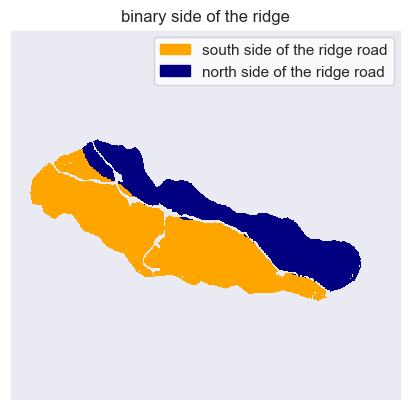

In [11]:
plt.figure(figsize=(4,4), constrained_layout = True)

# plot 3
ds['baf_ridge'].plot(vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"orange": "south side of the ridge road",
                "navy": "north side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

plt.legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

plt.title('binary side of the ridge')

plt.xlabel('');plt.ylabel('');plt.xticks([]);plt.yticks([])

# export the figure with high resolution
figure_name = 'side_of_ridge.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

/home/cassie/programs/miniforge3/envs/cer_treatment/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


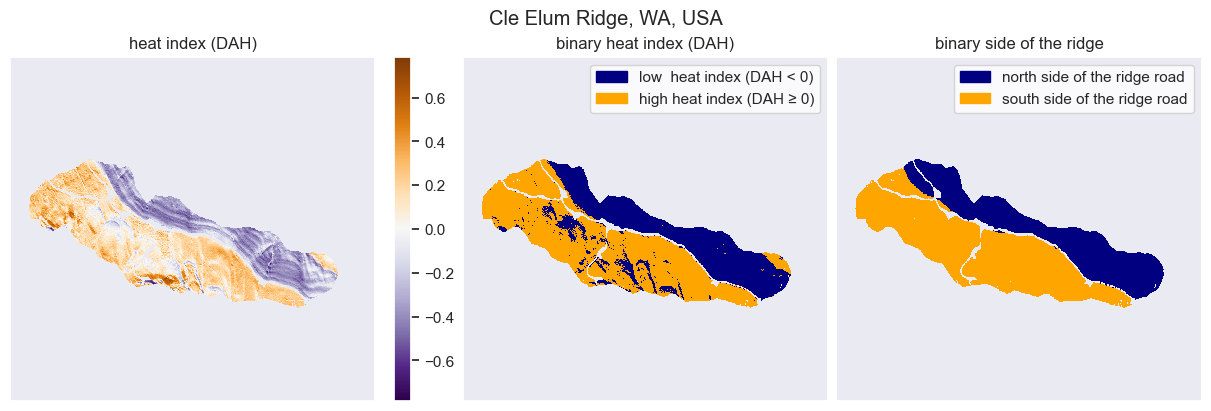

In [15]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# plot 1 and 2 for heat index
# ds.dah.plot(ax=axes[0],  vmin=-1, vmax=1, cmap='PuOr_r', cbar_kwargs={'label':''}) # setting the limit from -1 to 1 doesn't show the colors well...
ds.dah.plot(ax=axes[0], cmap='PuOr_r', cbar_kwargs={'label':''})

ds['dah_binary'].plot(ax=axes[1], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  


# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy" : "low  heat index (DAH < 0)", 
                 "orange": "high heat index (DAH ≥ 0)"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[0].set_title('heat index (DAH)')
axes[1].set_title('binary heat index (DAH)')


# plot 3
ds['baf_ridge'].plot(ax=axes[2], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy": "north side of the ridge road", 
                 "orange": "south side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[2].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[2].set_title('binary side of the ridge')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

# # add A, B, and C in the left hand corner of each plot
# axes[0].text(-0.1, 1.1, 'a)', transform=axes[0].transAxes,
#               fontsize=16, fontweight='bold', va='top')
# axes[1].text(-0.1, 1.1, 'b)', transform=axes[1].transAxes,
#                 fontsize=16, fontweight='bold', va='top')
# axes[2].text(-0.1, 1.1, 'c)', transform=axes[2].transAxes,
#                 fontsize=16, fontweight='bold', va='top')

# # export the figure with high resolution
# figure_name = 'dah_figure.png'
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

In [9]:
# Code to add the scalebar and the black background like Steven's code 
# # from matplotlib_scalebar.scalebar import ScaleBar
# [ax1, ax2, ax3, ax4, ax5, ax6] = axs.ravel()

# # create scale bars
# for this_ax in [ax1, ax2, ax3]:
#     this_ax.set_facecolor("black")
#     scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
#     this_ax.add_artist(scalebar)
#     this_ax.set_xlabel('')
#     this_ax.set_ylabel('') 
#     this_ax.set_xticks([])
#     this_ax.set_yticks([])

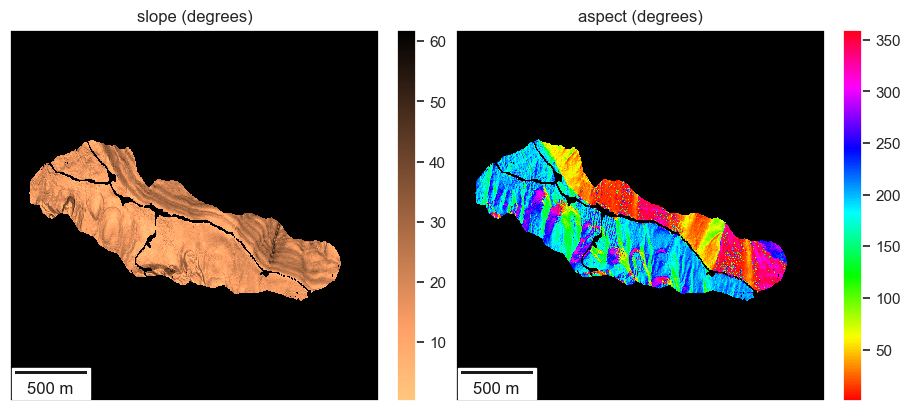

In [ ]:
# create a slope and aspect figure also
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,4), constrained_layout = True)
ax1, ax2 = axes
# plot the slope and aspect on the first axis
ds['slope'].plot(ax=ax1, cmap='copper_r', cbar_kwargs={'label':''})
ds['aspect'].plot(ax=ax2, cmap='hsv', cbar_kwargs={'label':''})

ax1.set_title('slope (degrees)')
ax2.set_title('aspect (degrees)')

# create scale bars
for this_ax in [ax1, ax2]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    
# export the figure with high resolution
# figure_name = 'slope_aspect.png'
# plt.savefig(figure_path + figure_name, dpi=500)


plt.show()

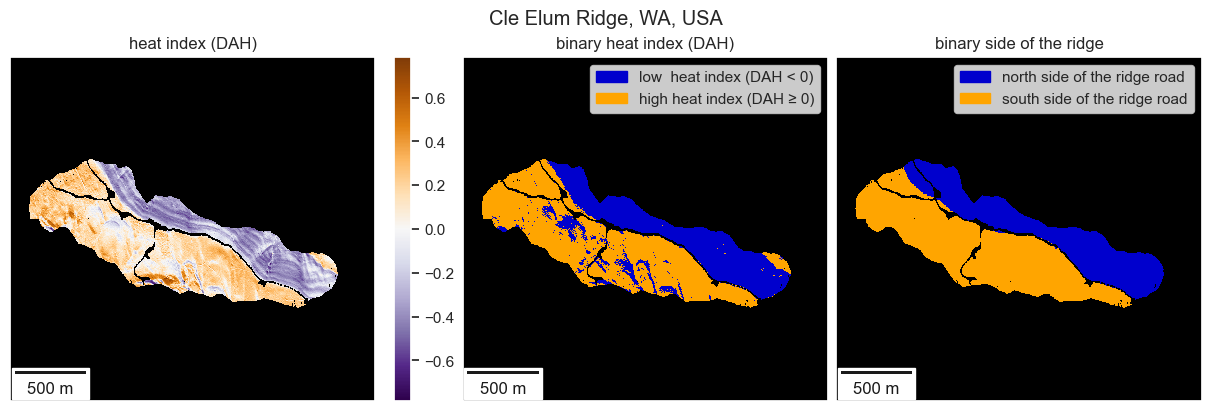

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# plot 1 and 2 for heat index
# ds.dah.plot(ax=axes[0],  vmin=-1, vmax=1, cmap='PuOr_r', cbar_kwargs={'label':''}) # setting the limit from -1 to 1 doesn't show the colors well...
ds.dah.plot(ax=axes[0], cmap='PuOr_r', cbar_kwargs={'label':''})

ds['dah_binary'].plot(ax=axes[1], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  


# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue" : "low  heat index (DAH < 0)", 
                 "orange": "high heat index (DAH ≥ 0)"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[0].set_title('heat index (DAH)')
axes[1].set_title('binary heat index (DAH)')


# plot 3
ds['baf_ridge'].plot(ax=axes[2], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue": "north side of the ridge road", 
                 "orange": "south side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[2].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[2].set_title('binary side of the ridge')


[ax1, ax2, ax3] = axes.ravel()

# create scale bars
for this_ax in [ax1, ax2, ax3]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])

# export the figure with high resolution
# figure_name = 'dah_figure_black.png'
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

Let's combine the two figures to make a single figure with slope, aspect, elevation, heat index, etc. 

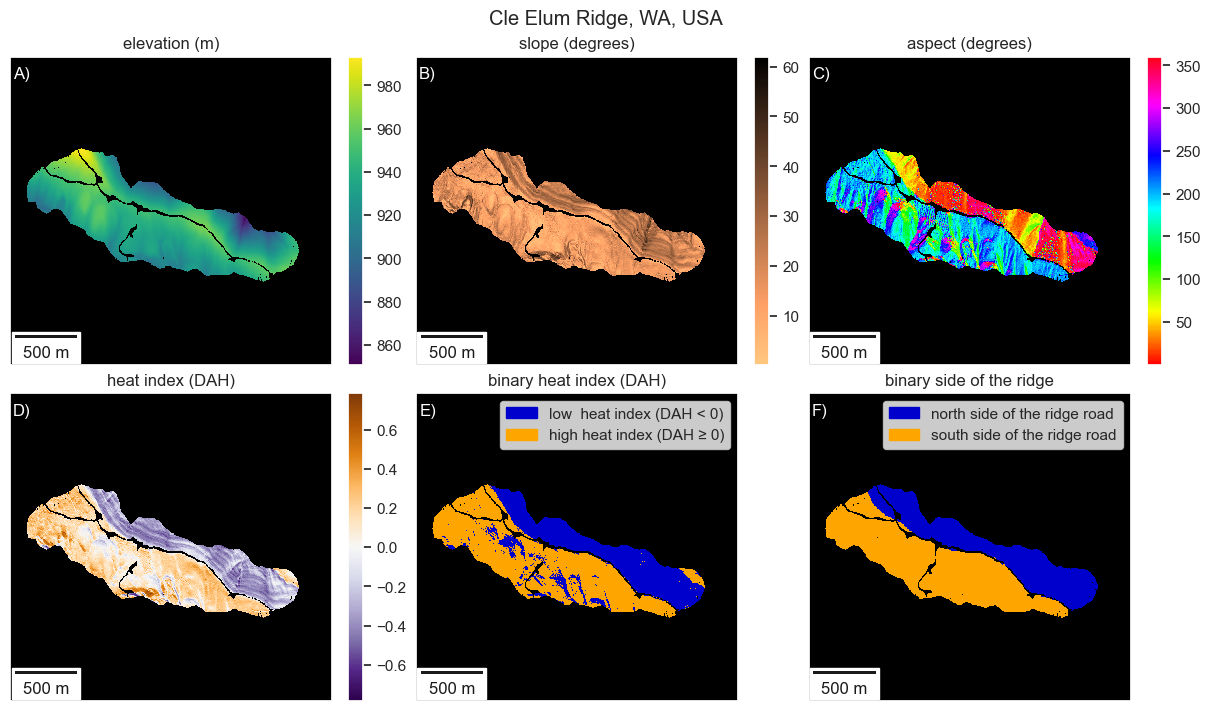

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,7), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# FIRST ROW 
ds['dem'].plot(ax=axes[0,0], cmap='viridis', cbar_kwargs={'label':''})
ds['slope'].plot(ax=axes[0,1], cmap='copper_r', cbar_kwargs={'label':''})
ds['aspect'].plot(ax=axes[0,2], cmap='hsv', cbar_kwargs={'label':''})

axes[0,0].set_title('elevation (m)')
axes[0,1].set_title('slope (degrees)')
axes[0,2].set_title('aspect (degrees)')


## SECOND ROW 
# plot 1 and 2 for heat index
ds['dah'].plot(ax=axes[1,0], cmap='PuOr_r', cbar_kwargs={'label':''})
ds['dah_binary'].plot(ax=axes[1,1], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  


# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue" : "low  heat index (DAH < 0)", 
                 "orange": "high heat index (DAH ≥ 0)"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1,1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[1, 0].set_title('heat index (DAH)')
axes[1, 1].set_title('binary heat index (DAH)')


# plot 3
ds['baf_ridge'].plot(ax=axes[1, 2], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue": "north side of the ridge road", 
                 "orange": "south side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1,2].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[1, 2].set_title('binary side of the ridge')


# CONSTANTS
[ax1, ax2, ax3, ax4, ax5, ax6] = axes.ravel()

# create scale bars
for this_ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    
    
# add A) B) C) D) to the subplots 
axes[0,0].text(0.01, 0.93, 'A)', fontsize=12, color='white', transform=axes[0,0].transAxes)
axes[0,1].text(0.01, 0.93, 'B)', fontsize=12, color='white', transform=axes[0,1].transAxes)ls
axes[0,2].text(0.01, 0.93, 'C)', fontsize=12, color='white', transform=axes[0,2].transAxes)

axes[1,0].text(0.01, 0.93, 'D)', fontsize=12, color='white', transform=axes[1,0].transAxes)
axes[1,1].text(0.01, 0.93, 'E)', fontsize=12, color='white', transform=axes[1,1].transAxes)
axes[1,2].text(0.01, 0.93, 'F)', fontsize=12, color='white', transform=axes[1,2].transAxes)

# export the figure with high resolution
# figure_name = 'dah_elevation.png' 
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

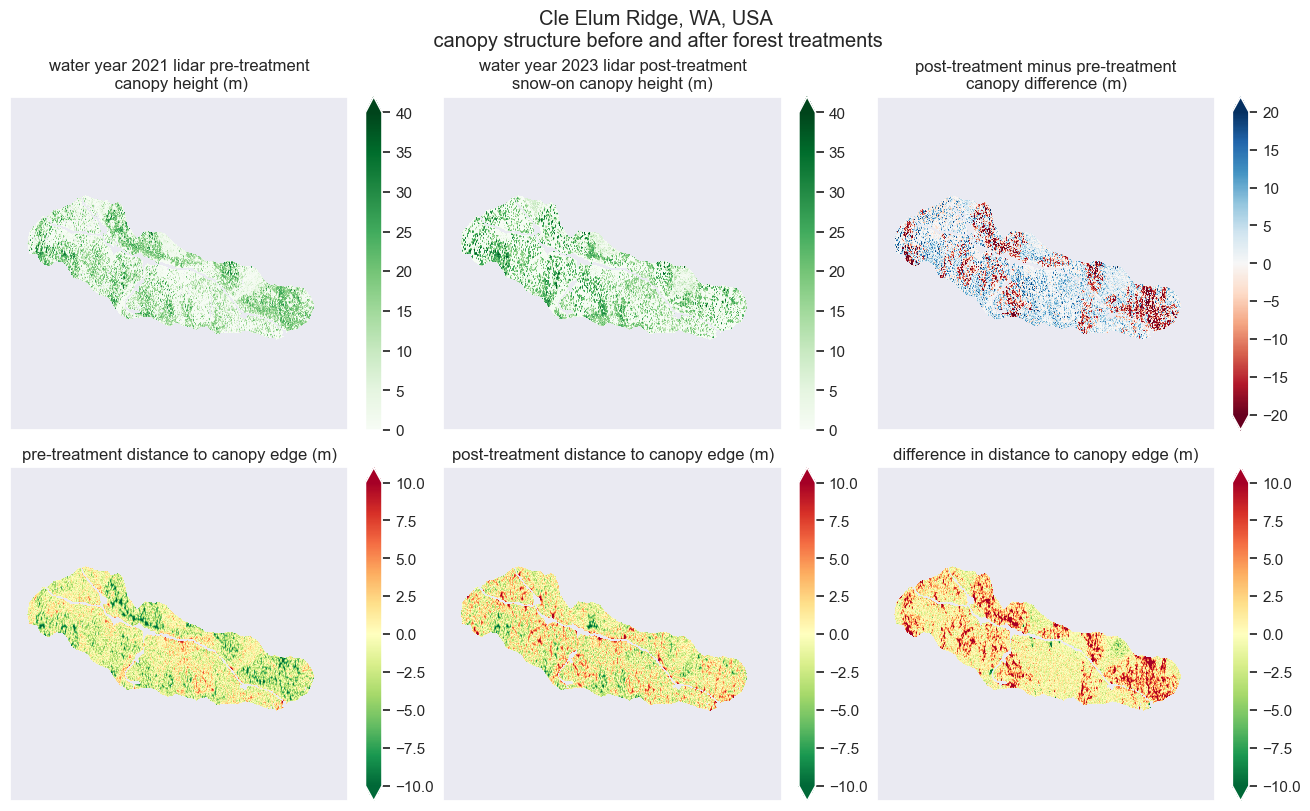

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')

# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

axes[0,0].set_title('water year 2021 lidar pre-treatment\n canopy height (m)')
axes[0,1].set_title('water year 2023 lidar post-treatment\nsnow-on canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds['dce_ncalm'].plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
# ds.dce_snowoff.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (m)')


# some constants 
# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# # row 3 
# axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
# axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
# axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])

# export the figure with high resolution
# figure_name = 'canopy_difference.png'
# plt.savefig(figure_path + figure_name, dpi=800)

plt.show()

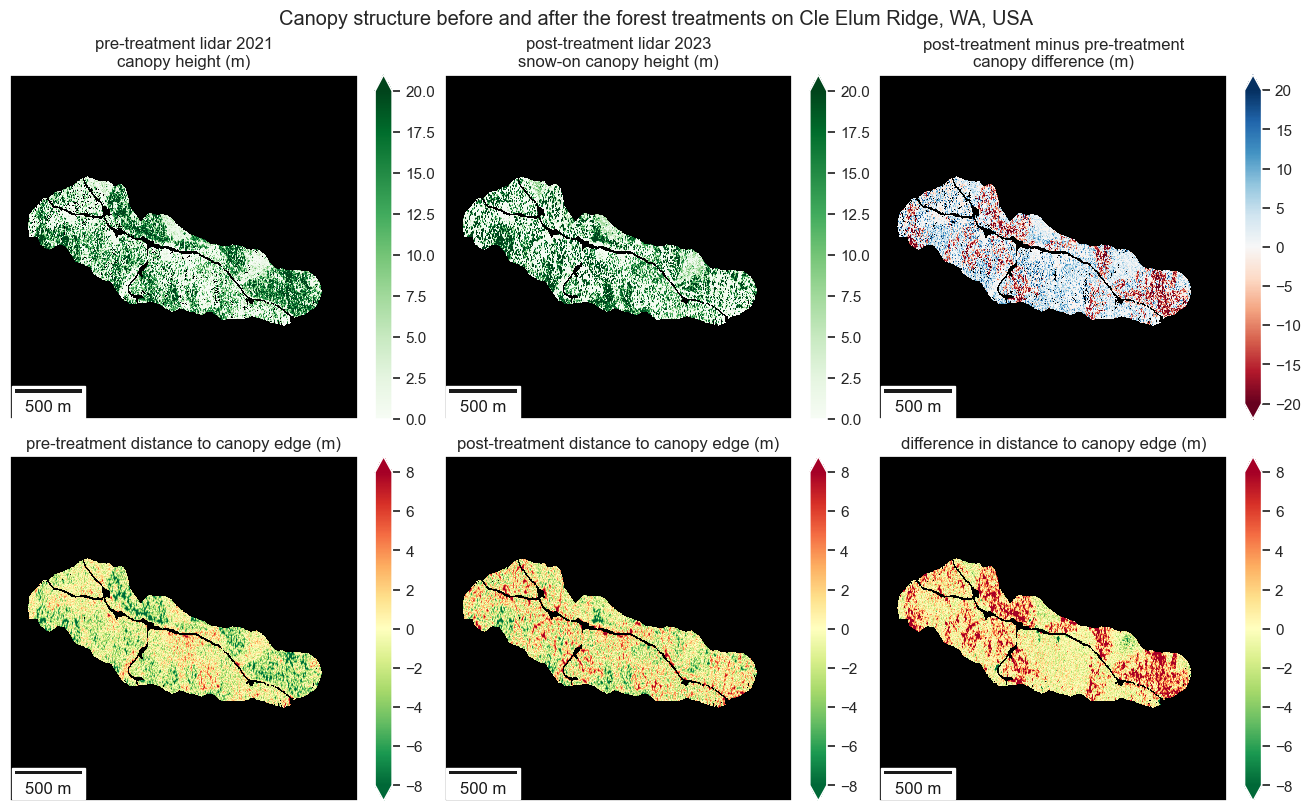

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13,8), constrained_layout = True)

# fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')
fig.suptitle('Canopy structure before and after the forest treatments on Cle Elum Ridge, WA, USA')


# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

axes[0,0].set_title('pre-treatment lidar 2021\ncanopy height (m)')
axes[0,1].set_title('post-treatment lidar 2023\nsnow-on canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds['dce_ncalm'].plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})
# ds.dce_snowoff.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (m)')

# set the axis names
[ax1, ax2, ax3, ax4, ax5, ax6] = axes.ravel()

# create scale bars
for this_ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])

# export the figure with high resolution
# figure_name = 'canopy_difference_black.png'
# plt.savefig(figure_path + figure_name, dpi=800)

plt.show()

### Add snow depth plots just to take a look...

In [12]:
ds['hs_ncalm']

<xarray.DataArray 'hs_ncalm' (band: 1, y: 1388, x: 2564)> Size: 14MB
[3558832 values with dtype=float32]
Coordinates:
  * x            (x) float64 21kB 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y            (y) float64 11kB 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
  * band         (band) int32 4B 1
    spatial_ref  int32 4B ...

/home/cassie/programs/miniforge3/envs/cer_treatment/lib/python3.13/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


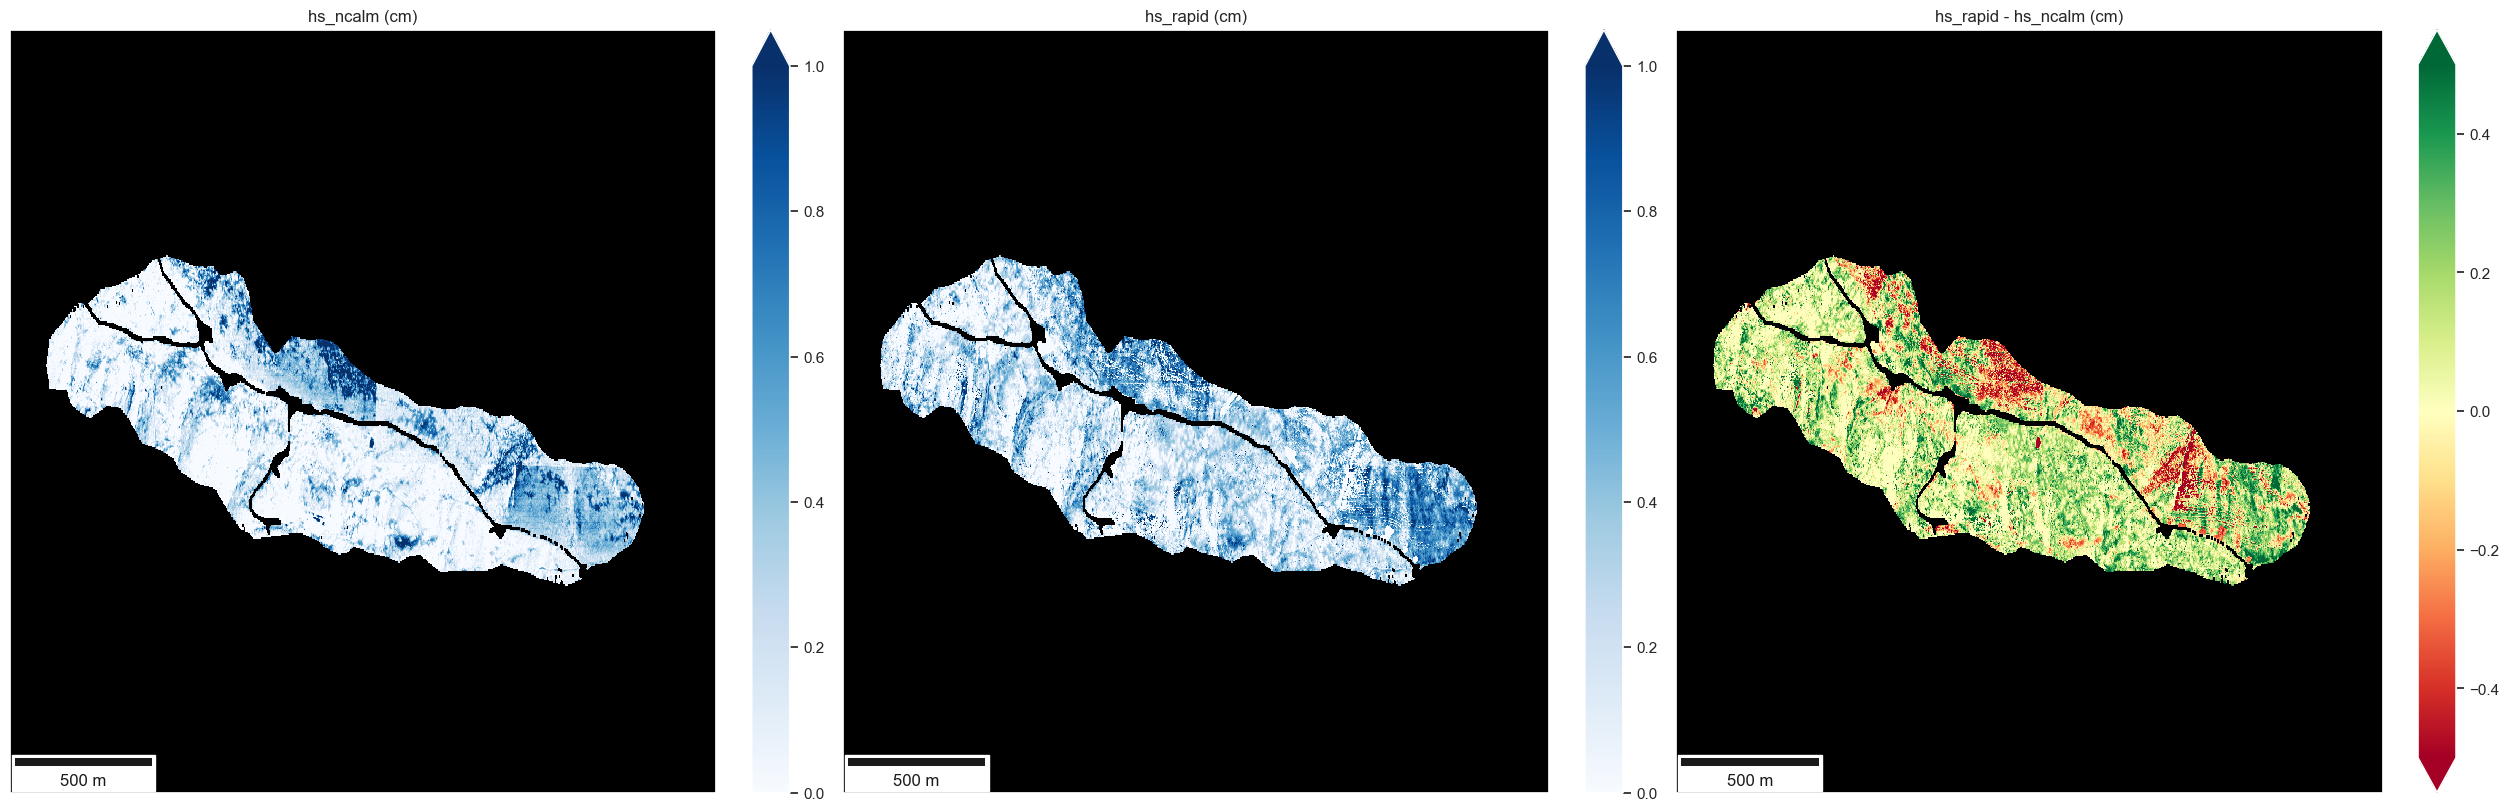

In [28]:
# create a slope and aspect figure also
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(25,8), constrained_layout = True)
ax1, ax2, ax3 = axes
# plot the slope and aspect on the first axis
ds['hs_ncalm'].plot(ax=ax1, cmap='Blues', cbar_kwargs={'label':''}, vmin=0, vmax=1)
ds['hs_rapid'].plot(ax=ax2, cmap='Blues', cbar_kwargs={'label':''}, vmin=0, vmax=1)
(ds['hs_rapid']-ds['hs_ncalm']).plot(ax=ax3, cmap='RdYlGn', cbar_kwargs={'label':''}, vmin=-0.5, vmax=0.5)

ax1.set_title('hs_ncalm (cm)')
ax2.set_title('hs_rapid (cm)')
ax3.set_title('hs_rapid - hs_ncalm (cm)')

# create scale bars
for this_ax in [ax1, ax2, ax3]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])

plt.show()